In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
# import the datasets
loans = pd.read_csv('lending_club_new_data.csv')
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,0.00,171.62,0,11,5,0.4,1,8.14350
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,0.00,117.08,1.11,119.66,1,1,4,0.8,1,2.39320
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,0.00,649.91,0,11,4,1.0,1,8.25955
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,16.97,0.00,0.00,357.48,0,11,4,0.2,1,8.27585
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,0.00,161.03,0,4,6,0.8,1,5.21533


In [135]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                9516 non-null   int64  
 1   funded_amnt              9516 non-null   int64  
 2   funded_amnt_inv          9516 non-null   int64  
 3   int_rate                 9516 non-null   float64
 4   installment              9516 non-null   float64
 5   annual_inc               9516 non-null   int64  
 6   dti                      9516 non-null   float64
 7   delinq_2yrs              9516 non-null   int64  
 8   inq_last_6mths           9516 non-null   int64  
 9   open_acc                 9516 non-null   int64  
 10  total_pymnt              9516 non-null   float64
 11  total_pymnt_inv          9516 non-null   float64
 12  total_rec_prncp          9516 non-null   float64
 13  total_rec_int            9516 non-null   float64
 14  total_rec_late_fee      

In [136]:
# adding good loans and make it as target
loans['good_loans'] = loans['bad_loans'].apply(lambda y: 'yes' if y==0 else 'no')

In [137]:
loans['good_loans'].head()

0    yes
1     no
2    yes
3    yes
4    yes
Name: good_loans, dtype: object

In [138]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio,good_loans
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,171.62,0,11,5,0.4,1,8.14350,yes
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,117.08,1.11,119.66,1,1,4,0.8,1,2.39320,no
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,649.91,0,11,4,1.0,1,8.25955,yes
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,0.00,0.00,357.48,0,11,4,0.2,1,8.27585,yes
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,161.03,0,4,6,0.8,1,5.21533,yes


In [139]:
x = loans.drop(['bad_loans', 'good_loans'], axis=1)
y = loans['good_loans']

In [140]:
x.shape, y.shape

((9516, 23), (9516,))

In [141]:
# let's import the train_test_split
from sklearn.model_selection import train_test_split

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=7)

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [187]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [188]:
print("Accuracy Score of Random Forest is::", accuracy_score(y_test, prediction))

Accuracy Score of Random Forest is:: 0.9544658493870403


In [146]:
confusion_matrix(y_test, prediction)

array([[ 468,   19],
       [   0, 2368]], dtype=int64)

In [147]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       1.00      0.96      0.98       487
         yes       0.99      1.00      1.00      2368

    accuracy                           0.99      2855
   macro avg       1.00      0.98      0.99      2855
weighted avg       0.99      0.99      0.99      2855



### Decision Tree Classifier

In [184]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=2)
model1.fit(x_train, y_train)
prediction = model1.predict(x_test)

In [185]:
print("Accuracy Score for Decision Tree is::", accuracy_score(y_test, prediction))

Accuracy Score for Decision Tree is:: 0.9544658493870403


In [149]:
confusion_matrix(y_test, prediction)

array([[ 403,   84],
       [  61, 2307]], dtype=int64)

In [150]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.87      0.83      0.85       487
         yes       0.96      0.97      0.97      2368

    accuracy                           0.95      2855
   macro avg       0.92      0.90      0.91      2855
weighted avg       0.95      0.95      0.95      2855



### Check the overfitting of the model

In [151]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
train_scores=[]
test_scores=[]
for i in values:
    # configure the model
    model1 = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model1.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model1.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model1.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)  
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.934, test: 0.929
>2, train: 0.955, test: 0.949
>3, train: 0.971, test: 0.968
>4, train: 0.982, test: 0.982
>5, train: 0.983, test: 0.981
>6, train: 0.986, test: 0.981
>7, train: 0.988, test: 0.984
>8, train: 0.991, test: 0.985
>9, train: 0.991, test: 0.986
>10, train: 0.997, test: 0.991
>11, train: 0.997, test: 0.991
>12, train: 0.997, test: 0.991
>13, train: 0.998, test: 0.990
>14, train: 0.998, test: 0.991
>15, train: 0.999, test: 0.991
>16, train: 1.000, test: 0.991
>17, train: 1.000, test: 0.991
>18, train: 1.000, test: 0.991
>19, train: 1.000, test: 0.991
>20, train: 1.000, test: 0.991


### Check the overfitting by visualization

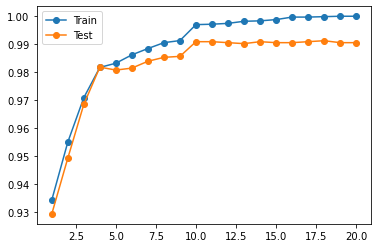

In [152]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

### Support Vector Machine

In [153]:
from sklearn.svm import SVC

In [154]:
clf_svm=SVC(kernel='rbf', random_state=62)

In [155]:
clf_svm.fit(x_train, y_train)

SVC(random_state=62)

In [181]:
y_pred=clf_svm.predict(x_test)

In [182]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of SVM is::", accuracy_score(y_test, y_pred))

Accuracy Score of SVM is:: 0.965323992994746


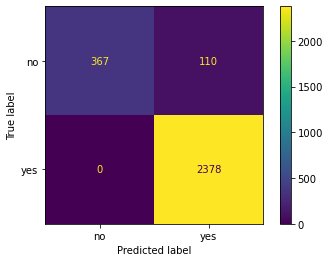

In [158]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf_svm, x_test, y_test)  
plt.show()

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.21      0.17      0.19       477
         yes       0.84      0.87      0.85      2378

    accuracy                           0.75      2855
   macro avg       0.52      0.52      0.52      2855
weighted avg       0.73      0.75      0.74      2855



### Check the accuracies for different test size

In [160]:
test_size = [0.2, 0.25, 0.3, 0.35, 0.40, 0.45]

accuracy = []
for i in test_size:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=60)
    svm=SVC(kernel='rbf', random_state=62)
    svm.fit(x_train, y_train)
    y_pred=svm.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))      

Text(0, 0.5, 'accuracy')

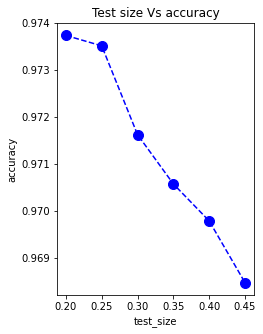

In [161]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.plot(test_size, accuracy,  color='blue', linestyle='dashed', marker='o', markersize=10)
plt.title('Test size Vs accuracy')
plt.xlabel('test_size')
plt.ylabel('accuracy')

### K Nearest Neighbors

In [162]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [163]:
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [164]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the values of k to evaluate
values = [k for k in range(1, 11)]
# evaluate a decision tree for each depth
for k in values:
    # configure the model
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit model on the training dataset
    knn.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = knn.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = knn.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (k, train_acc, test_acc))

>1, train: 1.000, test: 0.983
>2, train: 0.996, test: 0.981
>3, train: 0.986, test: 0.982
>4, train: 0.986, test: 0.982
>5, train: 0.979, test: 0.976
>6, train: 0.980, test: 0.977
>7, train: 0.975, test: 0.971
>8, train: 0.976, test: 0.972
>9, train: 0.971, test: 0.966
>10, train: 0.972, test: 0.966


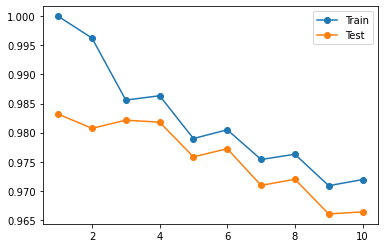

In [165]:
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()
#Evaluation of the graph
# We are looking a graph where performance of the test size is increased and goes down. So from the graph, it looks like k=3 is perfect.

In [166]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [167]:
knn_pred=knn.predict(x_test)

In [168]:
knn_pred

array(['yes', 'no', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [169]:
accuracy_score(y_test, knn_pred)

0.9821366024518389

In [171]:
confusion_matrix(y_test, knn_pred)

array([[ 435,   49],
       [   2, 2369]], dtype=int64)

In [172]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          no       1.00      0.90      0.94       484
         yes       0.98      1.00      0.99      2371

    accuracy                           0.98      2855
   macro avg       0.99      0.95      0.97      2855
weighted avg       0.98      0.98      0.98      2855



### Results:
+ The following is the accuracies of the classifiers used in this project

In [176]:
print("Accuracy Score of KNN is::", accuracy_score(y_test, knn_pred))

Accuracy Score of KNN is:: 0.9821366024518389


In [183]:
print("Accuracy Score of SVM is::", accuracy_score(y_test, y_pred))

Accuracy Score of SVM is:: 0.965323992994746


In [186]:
print("Accuracy Score for Decision Tree is::", accuracy_score(y_test, prediction))

Accuracy Score for Decision Tree is:: 0.9544658493870403


In [189]:
print("Accuracy Score of Random Forest is::", accuracy_score(y_test, prediction))

Accuracy Score of Random Forest is:: 0.9544658493870403


#### Conclusion: The accuracy score of KNN is better than other classifiers.




##### Reference::https://machinelearningmastery.com/overfitting-machine-learning-models/